
Training with SGD
Epoch 1/10 - SGD loss: 0.9384, accuracy: 0.7137
Epoch 2/10 - SGD loss: 0.3466, accuracy: 0.8998
Epoch 3/10 - SGD loss: 0.2734, accuracy: 0.9213
Epoch 4/10 - SGD loss: 0.2296, accuracy: 0.9344
Epoch 5/10 - SGD loss: 0.1986, accuracy: 0.9427
Epoch 6/10 - SGD loss: 0.1761, accuracy: 0.9488
Epoch 7/10 - SGD loss: 0.1589, accuracy: 0.9540
Epoch 8/10 - SGD loss: 0.1452, accuracy: 0.9574
Epoch 9/10 - SGD loss: 0.1342, accuracy: 0.9608
Epoch 10/10 - SGD loss: 0.1246, accuracy: 0.9635

Training with Adam
Epoch 1/10 - Adam loss: 0.3350, accuracy: 0.9010
Epoch 2/10 - Adam loss: 0.1985, accuracy: 0.9448
Epoch 3/10 - Adam loss: 0.1709, accuracy: 0.9520
Epoch 4/10 - Adam loss: 0.1570, accuracy: 0.9568
Epoch 5/10 - Adam loss: 0.1499, accuracy: 0.9604
Epoch 6/10 - Adam loss: 0.1323, accuracy: 0.9647
Epoch 7/10 - Adam loss: 0.1251, accuracy: 0.9667
Epoch 8/10 - Adam loss: 0.1242, accuracy: 0.9685
Epoch 9/10 - Adam loss: 0.1200, accuracy: 0.9694
Epoch 10/10 - Adam loss: 0.1089, accura

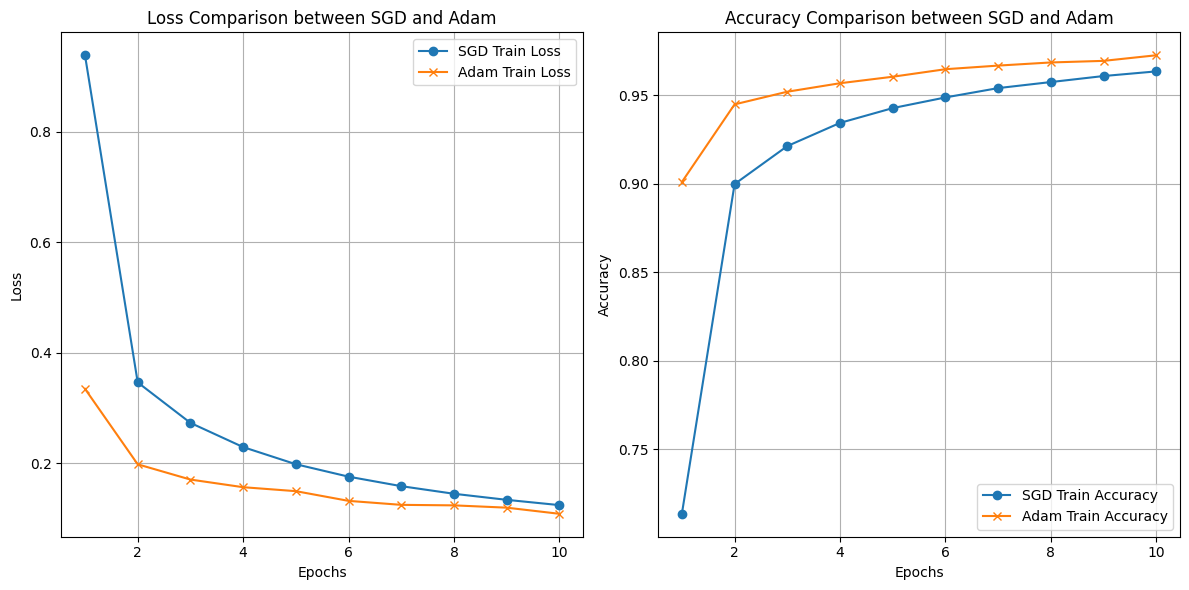

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def create_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28 * 28)
    x_test = x_test.reshape(-1, 28 * 28)
    return x_train, y_train, x_test, y_test

def create_model(layers_config):
    model = models.Sequential()
    model.add(layers.Dense(layers_config[0], activation='relu', input_shape=(28 * 28,)))
    for units in layers_config[1:]:
        model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

def train_model_with_history(model, optimizer, x_train, y_train, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = {
        'loss': [],
        'accuracy': []
    }

    for epoch in range(epochs):
        hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=0)

        history['loss'].append(hist.history['loss'][0])
        history['accuracy'].append(hist.history['accuracy'][0])

        print(f"Epoch {epoch + 1}/{epochs} - {optimizer_name} loss: {history['loss'][-1]:.4f}, accuracy: {history['accuracy'][-1]:.4f}")

    return history


x_train, y_train, x_test, y_test = create_data()
layers_config = [50, 20, 15]

optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.01)

epochs = 10
batch_size = 32

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model_sgd = create_model(layers_config)
model_adam = create_model(layers_config)

print("\nTraining with SGD")
sgd_history = train_model_with_history(model_sgd, optimizer_sgd, x_train, y_train, batch_size, epochs, 'SGD')
print("\nTraining with Adam")
adam_history = train_model_with_history(model_adam, optimizer_adam, x_train, y_train, batch_size, epochs, 'Adam')

sgd_test_loss, sgd_test_acc = model_sgd.evaluate(x_test, y_test, verbose=0)
adam_test_loss, adam_test_acc = model_adam.evaluate(x_test, y_test, verbose=0)

print(f"\nSGD Test Loss: {sgd_test_loss:.4f}, Test Accuracy: {sgd_test_acc:.4f}")
print(f"Adam Test Loss: {adam_test_loss:.4f}, Test Accuracy: {adam_test_acc:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), sgd_history['loss'], label='SGD Train Loss', marker='o')
plt.plot(range(1, epochs + 1), adam_history['loss'], label='Adam Train Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison between SGD and Adam')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), sgd_history['accuracy'], label='SGD Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), adam_history['accuracy'], label='Adam Train Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between SGD and Adam')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
